In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import statsmodels.tools as smt

In [2]:
df = pd.read_csv('daily-min-temperatures.csv', header=0)

In [10]:
df.shape

(3650, 2)

In [4]:
df.columns

Index(['Date', 'Temp'], dtype='object')

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

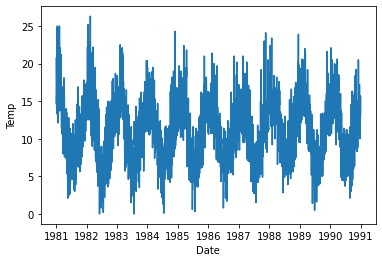

In [26]:
sns.lineplot(x='Date', y='Temp', data=df)

In [28]:
df.Date.min()

Timestamp('1981-01-01 00:00:00')

In [17]:
tsa.adfuller(df.Temp)

(-4.444804924611691,
 0.00024708263003610866,
 20,
 3629,
 {'1%': -3.4321532327220154,
  '5%': -2.862336767636517,
  '10%': -2.56719413172842},
 16642.822304301197)

In [16]:
tsa.adfuller(df.Temp, regression='nc')

(-1.2501217634477346,
 0.19428438113331586,
 25,
 3624,
 {'1%': -2.566357218771472,
  '5%': -1.941074372559225,
  '10%': -1.6167469169329427},
 16657.657043288866)

In [69]:
temp = pd.Series(data = list(df['Temp']), index= pd.date_range(df.Date.min(), periods=len(df['Temp']), freq='D'), name='temp', dtype='float', copy=True)

In [70]:
temp

1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-25    14.0
1990-12-26    13.6
1990-12-27    13.5
1990-12-28    15.7
1990-12-29    13.0
Freq: D, Name: temp, Length: 3650, dtype: float64

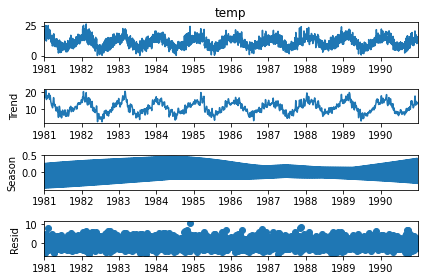

In [82]:
stl = STL(temp, seasonal =365)
res = stl.fit()
fig = res.plot()

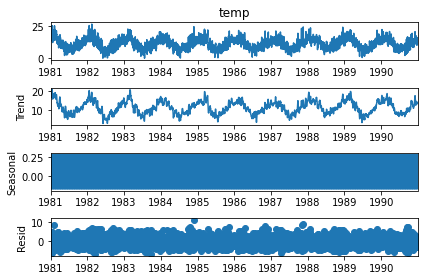

In [83]:
sd = seasonal_decompose(temp, model='additive')
fig = sd.plot()